In [1]:
import scvelo as scv
import pandas as pd

In [2]:
diff3 = scv.read('Diff_3/velocyto/Diff_3.loom')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
diff4 = scv.read('Diff_4/velocyto/Diff_4.loom')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
reg1 = scv.read('Regular_1/velocyto/Regular_1.loom')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [5]:
reg2 = scv.read('Regular_2/velocyto/Regular_2.loom')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
umap = pd.read_table('second_Larry_integrative_res1_labelled_umap.xls')
meta = pd.read_table('second_Larry_integrative_res1_labelled_meta.xls')

In [7]:
cellnames = list(map(lambda x, y: f"{x}:{y.split('_')[0]+'x'}", meta.loc[:, 'orig.ident'], meta.index))

In [8]:
meta.index = cellnames
umap.index = cellnames

In [9]:
umap.head()

,UMAP_1,UMAP_2
Regular_1:AAACCCAAGATGGGCTx,2.646962,5.005016
Regular_1:AAACCCAAGCAAGGAAx,-0.501442,1.737569
Regular_1:AAACCCAAGGTTCAGGx,2.620645,-6.675629
Regular_1:AAACCCACACGCGTGTx,-1.994728,-0.253414
Regular_1:AAACCCACAGACAAGCx,3.217281,-1.473950


In [10]:
meta.head()

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,percent.ribo,lib.size.10k,RNA_snn_res.0.4,RNA_snn_res.0.6,RNA_snn_res.0.8,RNA_snn_res.1,RNA_snn_res.1.2,RNA_snn_res.1.4,RNA_snn_res.1.6,RNA_snn_res.1.8,RNA_snn_res.2,seurat_clusters,seurat_clusters2,celltype.stim,celltype
Regular_1:AAACCCAAGATGGGCTx,Regular_1,12458,3857,9.359448,20.372451,0.351371,2,1,1,10,6,4,5,3,2,Prolif,10,Prolif_Regular_1,Prolif
Regular_1:AAACCCAAGCAAGGAAx,Regular_1,7682,2840,5.779745,24.212445,0.247531,0,3,2,0,1,2,1,0,0,Ground,0,Ground_Regular_1,Ground
Regular_1:AAACCCAAGGTTCAGGx,Regular_1,18534,4426,6.755153,23.637639,0.455363,4,5,7,7,5,7,7,8,8,tEMT,7,EMT_Regular_1,EMT
Regular_1:AAACCCACACGCGTGTx,Regular_1,6068,2376,7.663151,21.852340,0.205962,3,4,3,3,2,3,4,5,4,Prolif,3,Prolif_Regular_1,Prolif
Regular_1:AAACCCACAGACAAGCx,Regular_1,8696,3177,7.221711,18.491260,0.271749,0,2,0,1,8,9,6,4,5,Ground,1,Ground_Regular_1,Ground


In [11]:
reg1_cells = reg1.obs_names[reg1.obs_names.isin(meta.index)]

In [12]:
reg2_cells = reg2.obs_names[reg2.obs_names.isin(meta.index)]

In [13]:
diff3_cells = diff3.obs_names[diff3.obs_names.isin(meta.index)]

In [14]:
diff4_cells = diff4.obs_names[diff4.obs_names.isin(meta.index)]

In [15]:
diff4_cells[:4]

Index(['Diff_4:AAAGGATTCAAGCGTTx', 'Diff_4:AACAAAGTCGTCGGGTx',
       'Diff_4:AACAAAGGTAACAGTAx', 'Diff_4:AAACCCATCGATTTCTx'],
      dtype='object')

In [16]:
diff3 = diff3[diff3_cells, :]
diff3.obsm['X_umap'] = umap.loc[diff3.obs_names, :].values
diff3.obs['cellstate'] = meta.loc[diff3.obs_names, 'seurat_clusters'].values

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [17]:
diff4 = diff4[diff4_cells, :]
diff4.obsm['X_umap'] = umap.loc[diff4.obs_names, :].values
diff4.obs['cellstate'] = meta.loc[diff4.obs_names, 'seurat_clusters'].values

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [18]:
reg1 = reg1[reg1_cells, :]
reg1.obsm['X_umap'] = umap.loc[reg1.obs_names, :].values
reg1.obs['cellstate'] = meta.loc[reg1.obs_names, 'seurat_clusters'].values

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [19]:
reg2 = reg2[reg2_cells, :]
reg2.obsm['X_umap'] = umap.loc[reg2.obs_names, :].values
reg2.obs['cellstate'] = meta.loc[reg2.obs_names, 'seurat_clusters'].values

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [20]:
scv.pp.filter_and_normalize(diff3, min_shared_counts=20, n_top_genes=1000)
scv.pp.moments(diff3, n_pcs=50, n_neighbors=50)
scv.tl.recover_dynamics(diff3, n_jobs=30)
scv.tl.velocity(diff3, mode='dynamical')
scv.tl.latent_time(diff3)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 23413 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:11) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 30/256 cores)


  0%|          | 0/603 [00:00<?, ?gene/s]

    finished (0:00:58) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/256 cores)


  0%|          | 0/4687 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 2 regions of root cells and 2 regions of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


In [21]:
scv.pp.filter_and_normalize(reg1, min_shared_counts=20, n_top_genes=1000)
scv.pp.moments(reg1, n_pcs=50, n_neighbors=50)
scv.tl.recover_dynamics(reg1, n_jobs=24)
scv.tl.velocity(reg1, mode='dynamical')
scv.tl.latent_time(reg1)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 23644 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:14) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 24/256 cores)


  0%|          | 0/482 [00:00<?, ?gene/s]

    finished (0:01:26) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/256 cores)


  0%|          | 0/9367 [00:00<?, ?cells/s]

    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 4 regions of root cells and 1 region of end points .
    finished (0:00:04) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:02) --> added 
    'latent_time', shared time (adata.obs)


In [22]:
scv.pp.filter_and_normalize(reg2, min_shared_counts=20, n_top_genes=1000)
scv.pp.moments(reg2, n_pcs=50, n_neighbors=50)
scv.tl.recover_dynamics(reg2, n_jobs=24)
scv.tl.velocity(reg2, mode='dynamical')
scv.tl.latent_time(reg2)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 22878 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 24/256 cores)


  0%|          | 0/699 [00:00<?, ?gene/s]

    finished (0:01:09) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/256 cores)


  0%|          | 0/5635 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 3 regions of root cells and 1 region of end points .
    finished (0:00:02) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


In [23]:
scv.pp.filter_and_normalize(diff4, min_shared_counts=20, n_top_genes=1000)
scv.pp.moments(diff4, n_pcs=50, n_neighbors=50)
scv.tl.recover_dynamics(diff4, n_jobs=24)
scv.tl.velocity(diff4, mode='dynamical')
scv.tl.latent_time(diff4)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 23080 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 24/256 cores)


  0%|          | 0/621 [00:00<?, ?gene/s]

    finished (0:00:38) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/256 cores)


  0%|          | 0/5016 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


In [24]:
color_dict = {
    'Ground':  '#773E14',
    'Hypoxia': "#EC8528",
    'UPR':  '#F1FA64',
    'EMT':  '#3B1673',
    'iEMT':  '#3B1673',
    'tEMT':  '#3B1673',    
    'Prolif': '#1440D8',
    'Muscle': '#E12727',
    'Histone': '#E24B8F',
    'Apoptosis': '#9E3CC8', 
    'Interferon': '#489F4B',
    'Unique#6': 'gray',
    'Unique#7': 'gray',
    'Unique#8': 'gray',
    'Unique #5': 'gray',
    'Unique #1': 'gray',
    'Unique #2': 'gray',
    'Unique #3': 'gray',
    'Unique #4': 'gray',
    'Unique #2_4': 'gray',
    'Unique #2_4_6': 'gray',
    'Unique #3_5_Muscle': 'gray',
    'Neural': '#00FFFD'
}

In [25]:
diff3.obs.loc[:, 'clusters'] = diff3.obs.loc[:, 'cellstate']
diff3.uns['clusters_colors'] = [color_dict[c] for c in diff3.obs['clusters'].cat.categories]

In [26]:
diff4.obs.loc[:, 'clusters'] = diff4.obs.loc[:, 'cellstate']
diff4.uns['clusters_colors'] = [color_dict[c] for c in diff4.obs['clusters'].cat.categories]

In [27]:
reg1.obs.loc[:, 'clusters'] = reg1.obs.loc[:, 'cellstate']
reg1.uns['clusters_colors'] = [color_dict[c] for c in reg1.obs['clusters'].cat.categories]

In [28]:
reg2.obs.loc[:, 'clusters'] = reg2.obs.loc[:, 'cellstate']
reg2.uns['clusters_colors'] = [color_dict[c] for c in reg2.obs['clusters'].cat.categories]

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


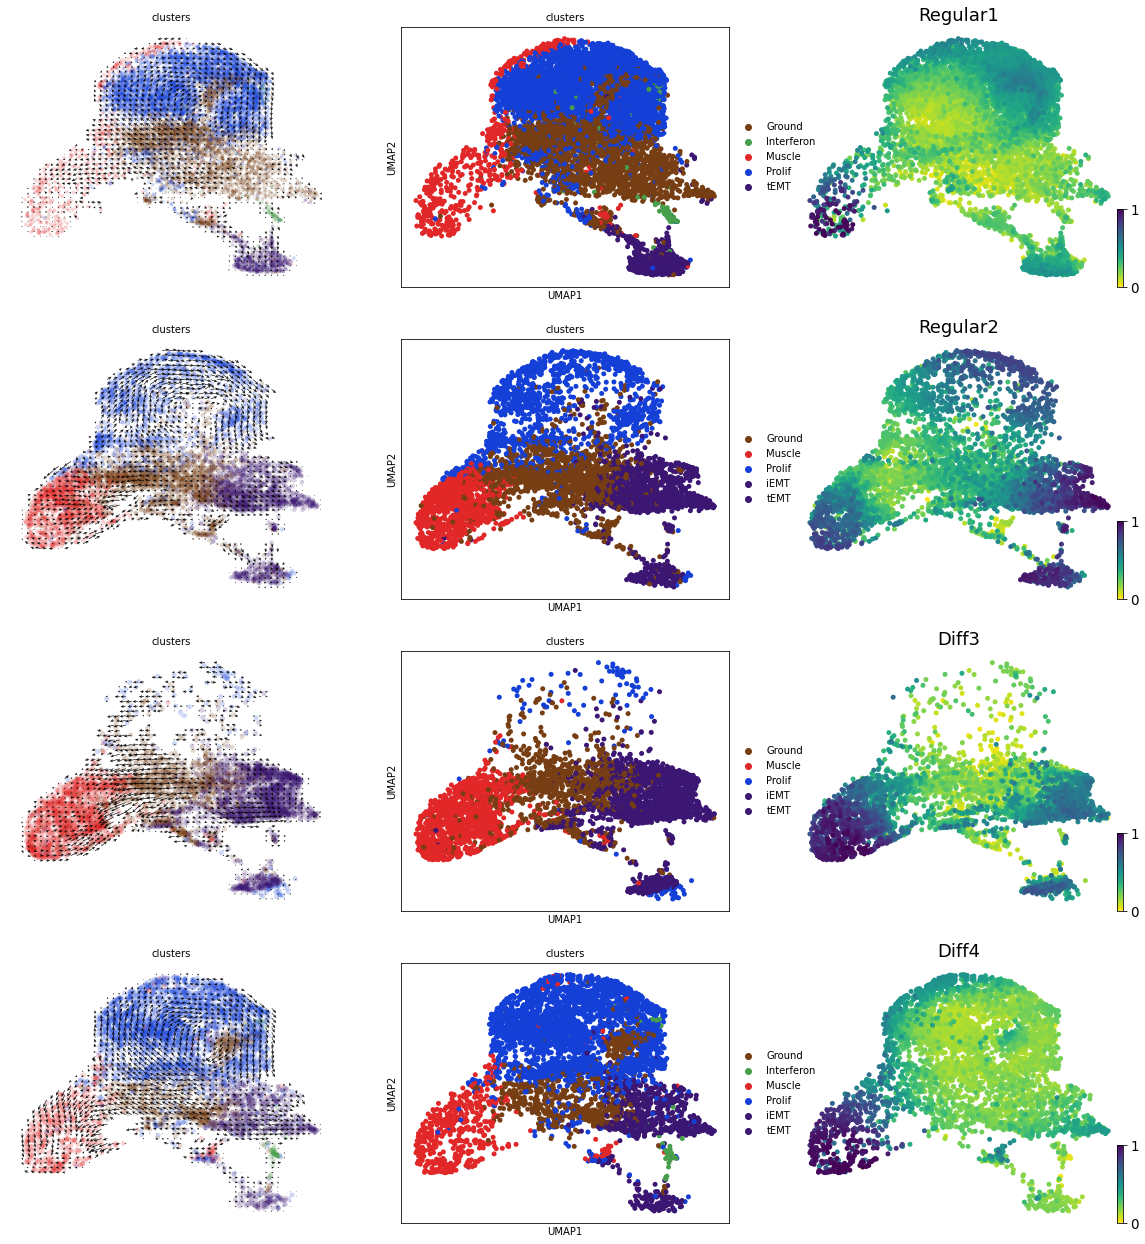

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 3)

fig.set_size_inches(20, 22)

n = 0
for obj, title in zip([reg1, reg2, diff3, diff4], 
                      ['Regular1', 'Regular2', 'Diff3', "Diff4"]):
    scv.pl.velocity_embedding_grid(obj, scale=0.1, color='clusters', ax=ax[n][0], show=False,
                                   legend_loc='none',
                                   arrow_color='black', arrow_size=1.5,
                                   autoscale=False)
    scv.pl.umap(obj, color='clusters', ax=ax[n][1], show=False,
                legend_loc='right margin', s=100, frameon=True)
    scv.pl.scatter(obj, basis='umap', color=['latent_time'], title=title,
                   size=100, legend_fontsize=18, fontsize=18,        
                   vmin=0, vmax=1.0, s=100,
                   show=False, ax=ax[n][2])
    n = n + 1

In [30]:
fig.savefig("Larry_velocity_analysis.pdf")

In [37]:
reg1.obs.head()

,Clusters,_X,_Y,cellstate,initial_size_spliced,initial_size_unspliced,initial_size,n_counts,velocity_self_transition,root_cells,end_points,velocity_pseudotime,latent_time,clusters
Regular_1:AAAGGTATCCCTCTCCx,1,-15.772032,-35.315571,Prolif,5064,2756,5064.0,4779.324219,0.057911,0.447505,0.178635,0.235559,0.443705,Prolif
Regular_1:AAAGGTACAGTTGAAAx,5,13.848938,3.948238,Ground,1724,1069,1724.0,4427.783691,0.180435,0.268979,0.028492,0.069854,0.098005,Ground
Regular_1:AAACGCTTCCTCTCTTx,12,3.875166,44.643139,Ground,4883,3965,4883.0,4838.214844,0.179339,0.250731,0.066905,0.070838,0.127400,Ground
Regular_1:AAAGAACCAAGAATACx,1,-35.478161,7.377158,Ground,8325,2685,8325.0,4776.396484,0.280223,0.102281,0.158475,0.205127,0.374746,Ground
Regular_1:AAAGGTACATGCGGTCx,10,31.450079,19.849813,Ground,5829,3012,5829.0,4698.790527,0.094948,0.180758,0.140646,0.048988,0.066110,Ground


In [38]:
latent_time_dfs = []
for obj, title in zip([reg1, reg2, diff3, diff4], 
                      ['Regular1', 'Regular2', 'Diff3', "Diff4"]):
    res = obj.obs.loc[obj.obs.clusters.isin(['iEMT', 'tEMT']), ['latent_time']]
    res.loc[:, 'condition'] = title
    latent_time_dfs.append(res)

In [41]:
latent_time_final = pd.concat(latent_time_dfs, axis=0)

In [42]:
latent_time_final.head()

,latent_time,condition
Regular_1:AAACGAAAGCCATTGTx,0.384042,Regular1
Regular_1:AAAGGTATCCCAGGACx,0.277498,Regular1
Regular_1:AAACCCATCGCGCTGAx,0.445284,Regular1
Regular_1:AAACGCTGTTCAAGTCx,0.319469,Regular1
Regular_1:AAACGCTTCCATTTCAx,0.237251,Regular1


In [43]:
import seaborn as sns

In [45]:
latent_time_final.head()

,latent_time,condition
Regular_1:AAACGAAAGCCATTGTx,0.384042,Regular1
Regular_1:AAAGGTATCCCAGGACx,0.277498,Regular1
Regular_1:AAACCCATCGCGCTGAx,0.445284,Regular1
Regular_1:AAACGCTGTTCAAGTCx,0.319469,Regular1
Regular_1:AAACGCTTCCATTTCAx,0.237251,Regular1


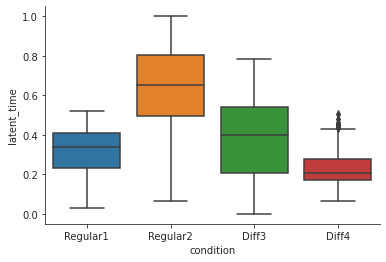

In [49]:
sns.boxplot(x='condition', y='latent_time', data=latent_time_final)
sns.set_style("ticks")
sns.despine()
plt.savefig('RD_Larry_latent_time_boxplot.pdf')

In [50]:
%pwd

'/data/langenau/alvin_singlecell/larry/claudia/second_run'